In [1]:
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
#!pip install seaborn
#!pip install yellowbrick
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Code added by Taufiq 

In [4]:
#income replace with median:
df['Income'].fillna(df['Income'].median(), inplace=True)

In [5]:
# 3. Total Number of Purchases a single customer make
df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

In [6]:
# Applying one-hot encoding to the 'Education' categorical variable
from sklearn.preprocessing import OneHotEncoder
education_ohe = pd.get_dummies(df['Education'], prefix='Education').astype('int')

# Adding the one-hot encoded columns to the main DataFrame
df = pd.concat([df, education_ohe], axis=1)

# Displaying the first few rows to verify the new columns
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Total_Purchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,3,11,1,25,0,0,1,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,3,11,0,6,0,0,1,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,3,11,0,21,0,0,1,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,3,11,0,8,0,0,1,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,3,11,0,19,0,0,0,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2240 non-null   int64  
 1   Year_Birth            2240 non-null   int64  
 2   Education             2240 non-null   object 
 3   Marital_Status        2240 non-null   object 
 4   Income                2240 non-null   float64
 5   Kidhome               2240 non-null   int64  
 6   Teenhome              2240 non-null   int64  
 7   Dt_Customer           2240 non-null   object 
 8   Recency               2240 non-null   int64  
 9   MntWines              2240 non-null   int64  
 10  MntFruits             2240 non-null   int64  
 11  MntMeatProducts       2240 non-null   int64  
 12  MntFishProducts       2240 non-null   int64  
 13  MntSweetProducts      2240 non-null   int64  
 14  MntGoldProds          2240 non-null   int64  
 15  NumDealsPurchases    

In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Total_Purchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.009375,3.0,11.0,0.149107,14.862054,0.090625,0.024107,0.503125,0.165179,0.216964
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.096391,0.0,0.0,0.356274,7.677173,0.287139,0.153416,0.500102,0.371425,0.412270
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.0,11.0,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,3.0,11.0,0.000000,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,3.0,11.0,0.000000,21.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,3.0,11.0,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000


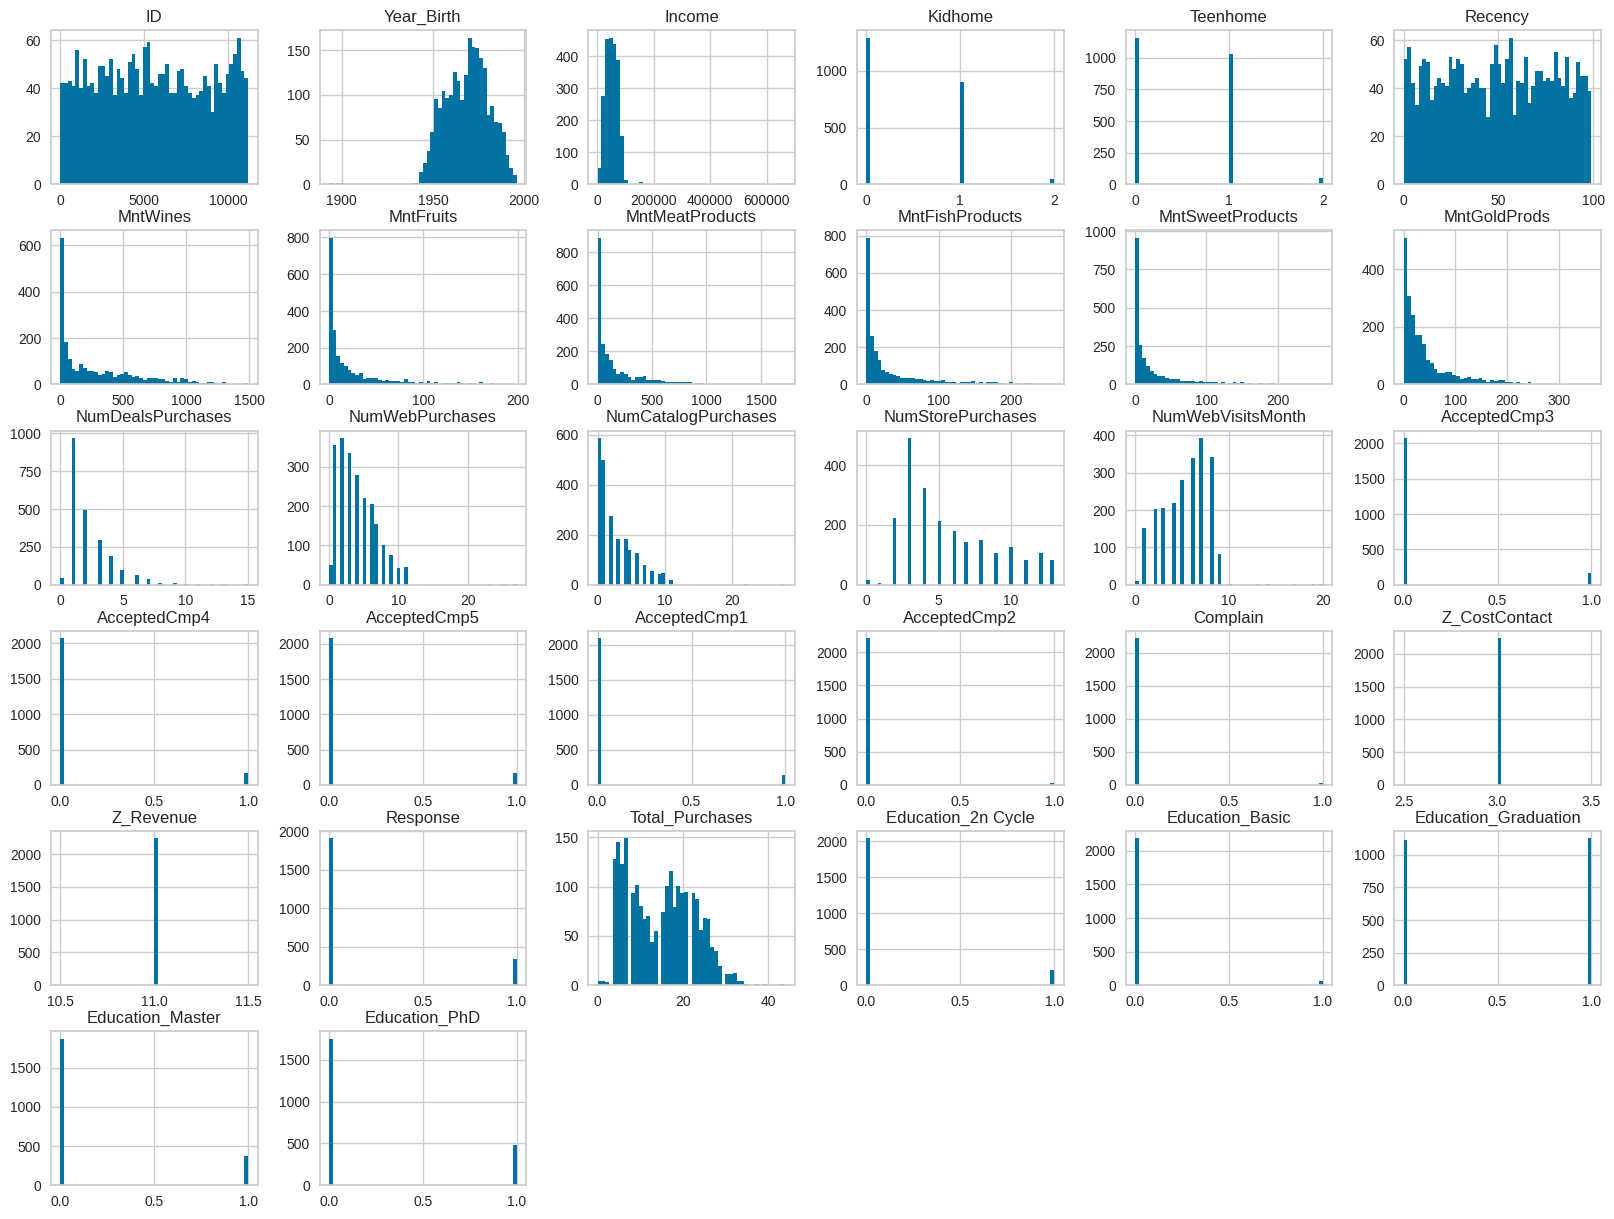

In [9]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
#corr_matrix =df.corr()
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

In [11]:
print(corr_matrix)

                            ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                    1.000000    0.000028  0.012996  0.002406 -0.002580   
Year_Birth            0.000028    1.000000 -0.160899  0.230176 -0.352111   
Income                0.012996   -0.160899  1.000000 -0.425326  0.018965   
Kidhome               0.002406    0.230176 -0.425326  1.000000 -0.036133   
Teenhome             -0.002580   -0.352111  0.018965 -0.036133  1.000000   
Recency              -0.046524   -0.019871 -0.004061  0.008827  0.016198   
MntWines             -0.022878   -0.157773  0.576903 -0.496297  0.004846   
MntFruits             0.004600   -0.017917  0.428791 -0.372581 -0.176764   
MntMeatProducts      -0.004437   -0.030872  0.577805 -0.437129 -0.261160   
MntFishProducts      -0.024475   -0.041625  0.437564 -0.387644 -0.204187   
MntSweetProducts     -0.007642   -0.018133  0.436131 -0.370673 -0.162475   
MntGoldProds         -0.013438   -0.061818  0.321938 -0.349595 -0.021725   
NumDealsPurc

In [12]:
df["Year_Birth"].value_counts()

Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64

In [13]:
df["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [14]:
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [15]:
df["Kidhome"].value_counts()

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64

In [16]:
df["Teenhome"].value_counts()

Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64

In [17]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Total_Purchases         0
Education_2n Cycle      0
Education_Basic         0
Education_Graduation    0
Education_Master        0
Education_PhD           0
dtype: int64


In [18]:
df=df.dropna(subset=["Income"]) 

In [19]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Total_Purchases         0
Education_2n Cycle      0
Education_Basic         0
Education_Graduation    0
Education_Master        0
Education_PhD           0
dtype: int64


array([[<Axes: xlabel='Income', ylabel='Income'>,
        <Axes: xlabel='MntWines', ylabel='Income'>,
        <Axes: xlabel='MntFruits', ylabel='Income'>,
        <Axes: xlabel='MntMeatProducts', ylabel='Income'>,
        <Axes: xlabel='MntFishProducts', ylabel='Income'>,
        <Axes: xlabel='MntSweetProducts', ylabel='Income'>,
        <Axes: xlabel='MntGoldProds', ylabel='Income'>],
       [<Axes: xlabel='Income', ylabel='MntWines'>,
        <Axes: xlabel='MntWines', ylabel='MntWines'>,
        <Axes: xlabel='MntFruits', ylabel='MntWines'>,
        <Axes: xlabel='MntMeatProducts', ylabel='MntWines'>,
        <Axes: xlabel='MntFishProducts', ylabel='MntWines'>,
        <Axes: xlabel='MntSweetProducts', ylabel='MntWines'>,
        <Axes: xlabel='MntGoldProds', ylabel='MntWines'>],
       [<Axes: xlabel='Income', ylabel='MntFruits'>,
        <Axes: xlabel='MntWines', ylabel='MntFruits'>,
        <Axes: xlabel='MntFruits', ylabel='MntFruits'>,
        <Axes: xlabel='MntMeatProducts', y

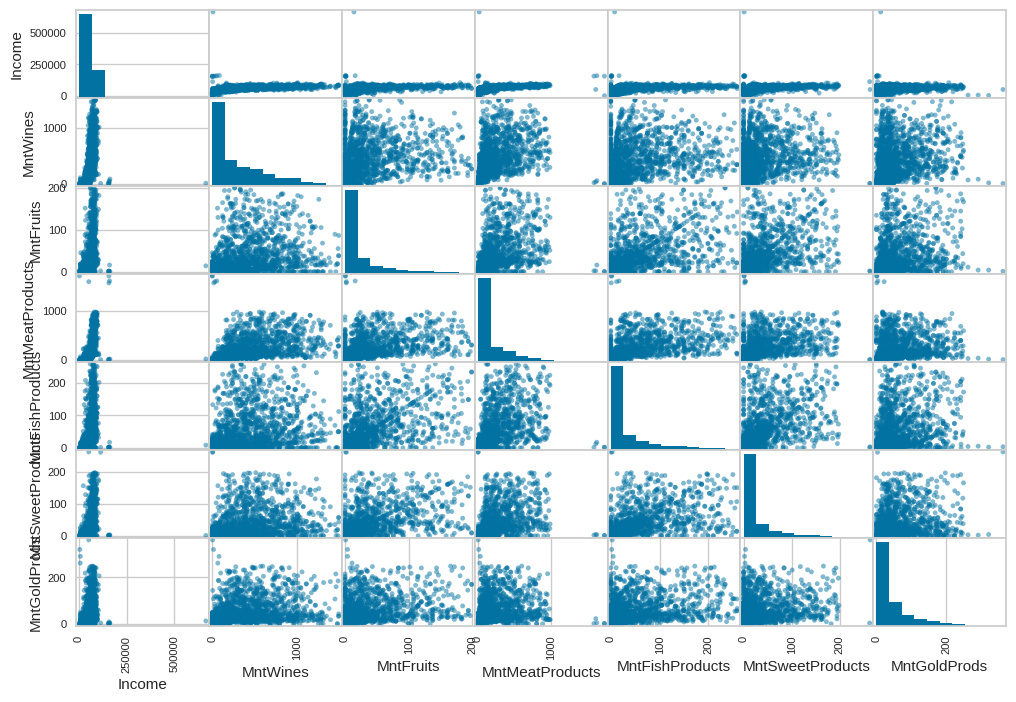

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["Income", "MntWines", "MntFruits",
 "MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
scatter_matrix(df[attributes], figsize=(12, 8))

In [21]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='mixed')
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [22]:
#creation d'une feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta.days)
#Arash:
df["days_a_customer"] = days #attribute name changed: df["Customer_For"] = days
#df["days_a_customer"] = pd.to_numeric(df["days_a_customer"], errors="coerce")


In [23]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Response,Total_Purchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,days_a_customer
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,2013-07-11 22:57:38.571428608,49.109375,303.935714,26.302232,166.950000,...,3.0,11.0,0.149107,14.862054,0.090625,0.024107,0.503125,0.165179,0.216964,512.043304
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-01-08 00:00:00,0.000000,0.000000,0.000000,0.000000,...,3.0,11.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2013-01-19 18:00:00,24.000000,23.750000,1.000000,16.000000,...,3.0,11.0,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,340.750000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-11 00:00:00,49.000000,173.500000,8.000000,67.000000,...,3.0,11.0,0.000000,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000,513.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,3.0,11.0,0.000000,21.000000,0.000000,0.000000,1.000000,0.000000,0.000000,685.250000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-12-06 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,3.0,11.0,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1063.000000
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,0.0,0.0,0.356274,7.677173,0.287139,0.153416,0.500102,0.371425,0.412270,232.229893


In [24]:
# 2020 is the oldest dataset update date. So we consider that as the analysis date
df["Age"] = 2020-df["Year_Birth"]

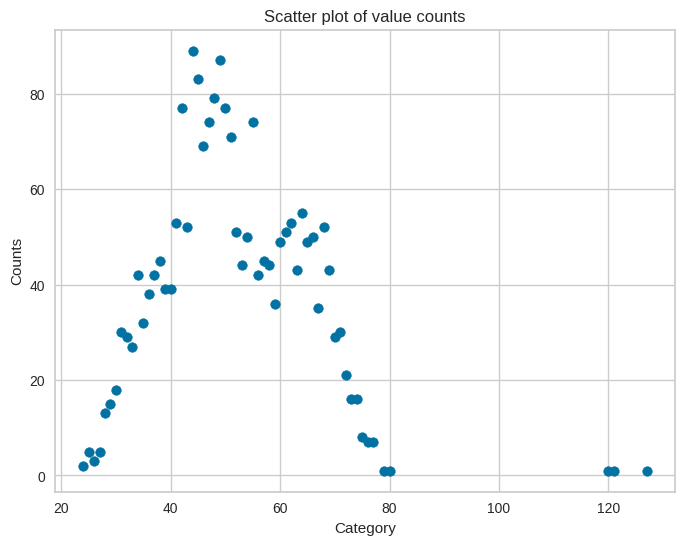

In [25]:
#Arash
age_counts = df["Age"].value_counts()
plt.figure(figsize=(8, 6))
plt.scatter(age_counts.index, age_counts.values)
plt.title('Scatter plot of value counts')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

In [26]:
age_counts.index.min()

24

In [27]:
#Arash: creating age-group
df.loc[df['Age']<40, 'age_group'] = 1 # young adults customers
df.loc[df['Age'].between(40,60), 'age_group'] = 2 # middle age
df.loc[df['Age']>39, 'age_group'] = 3 # old

In [28]:
#Arash: creating marital status dictionary and replacing values in data frame?
unique_marital_strings = list(df['Marital_Status'].unique())
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [29]:
#Arash:
marital_status_dict = {'Single': 1 ,'Together': 2, 'Married': 2, 'Divorced': 1, 'Widow': 1, 'Alone': 1, 'Absurd': np.NaN, 'YOLO': np.NaN}
df['adults_in_home'] = df['Marital_Status']
df['adults_in_home'] = df['adults_in_home'].map(lambda x : marital_status_dict.get(x))

In [30]:
#Arash:
df['adults_in_home'].isnull().value_counts()

adults_in_home
False    2236
True        4
Name: count, dtype: int64

In [31]:
df['Income'].isnull().value_counts()

Income
False    2240
Name: count, dtype: int64

In [32]:
#%pip install missingno
import missingno as msno

<Axes: >

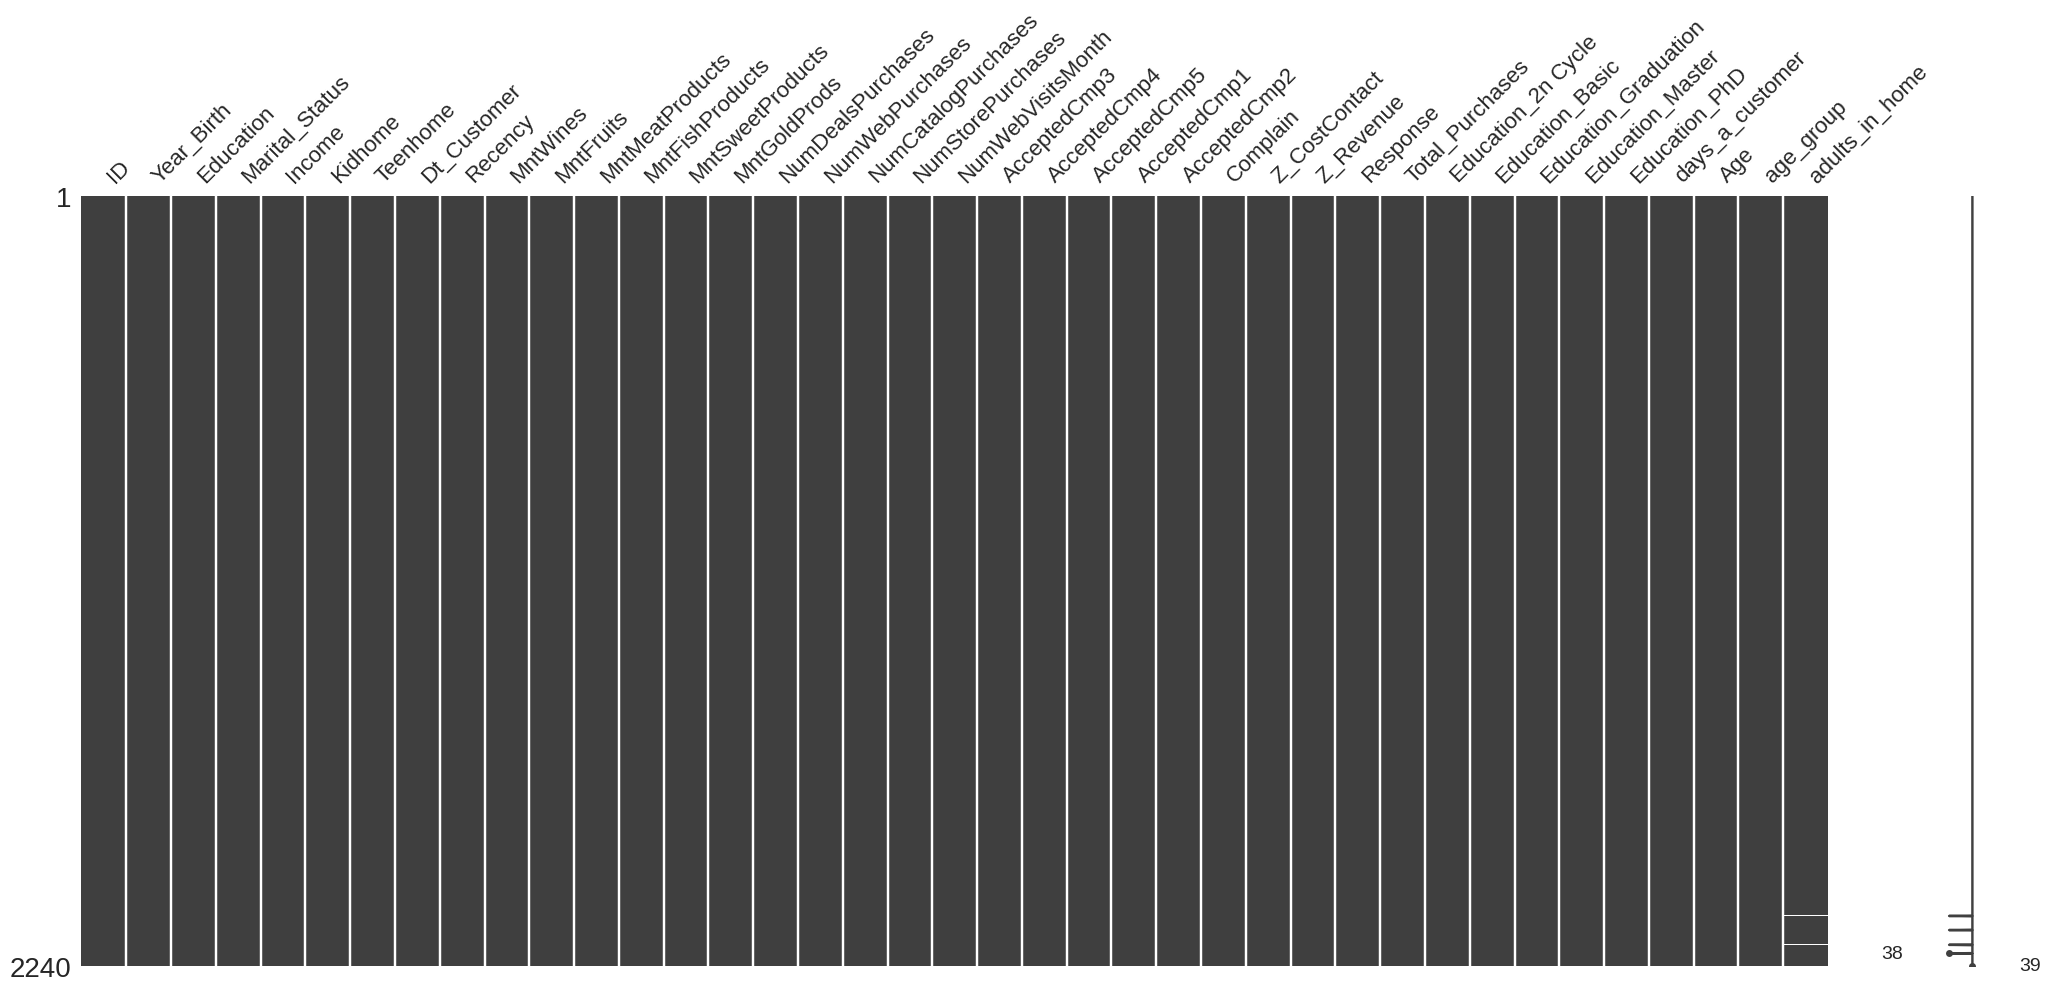

In [33]:
msno.matrix(df, )

In [34]:
#Arash:
df.dropna(axis=0, subset='adults_in_home', inplace= True)

In [35]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
df["Children"]=df["Kidhome"]+df["Teenhome"]

Arash: I think 'NumDealsPurchases' should not be included in the Total_Purchases value calculation in line below!

In [36]:
#Add by Taufiq: feature = Total Number of Purchases a single customer make
df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

In [37]:
#Arash: New attribute for leisure and essential products
df['leisure_purchases'] = df[['MntWines', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['essential_purchases'] = df[['MntFruits', 'MntMeatProducts', 'MntFishProducts']].sum(axis=1)

In [38]:
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

In [39]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]

In [40]:
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)
df["IncomePer"] =df["Income"]/df["Family_Size"]

Arash: I removed 'Income' from columns drop list

In [41]:
to_drop = ["Marital_Status", "Dt_Customer","Year_Birth",'Z_CostContact','Z_Revenue']
df= df.drop(to_drop, axis=1)

In [42]:
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

In [43]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [44]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


# ML by Zohreh?

In [240]:
selected_attributes = ['Education', 'IncomePer', 'Kidhome','Teenhome','Age','Spent','Living_With','Children','Family_Size','Is_Parent','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                     'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                     'NumWebVisitsMonth']
data1 = df[selected_attributes].copy()

In [241]:
#Scaling
scaler = StandardScaler()
scaler.fit(data1)
data1 = pd.DataFrame(scaler.transform(data1),columns= data1.columns )

print("All features are now scaled")

All features are now scaled


In [242]:
data1.head()

,Education,IncomePer,Kidhome,Teenhome,Age,Spent,Living_With,Children,Family_Size,Is_Parent,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,-0.350808,1.718121,-0.826182,-0.930507,1.016434,1.680059,-1.351043,-1.265157,-1.762182,-1.585863,...,1.555438,1.679390,2.471979,1.474217,0.851478,0.349860,1.407869,2.512794,-0.551703,0.692985
1,-0.350808,-0.483057,1.030855,0.905825,1.272917,-0.961188,-1.351043,1.393818,0.443758,0.630572,...,-0.635838,-0.713142,-0.650500,-0.631773,-0.729668,-0.167627,-1.109762,-0.568454,-1.166481,-0.131944
2,-0.350808,0.566666,-0.826182,-0.930507,0.332478,0.283022,0.740169,-1.265157,-0.659212,-1.585863,...,0.573142,-0.177038,1.351560,-0.147637,-0.035506,-0.685114,1.407869,-0.226093,1.292632,-0.544409
3,-0.350808,-0.821613,1.030855,-0.930507,-1.291916,-0.917998,0.740169,0.064330,0.443758,0.630572,...,-0.560277,-0.651114,-0.503560,-0.583359,-0.748950,-0.167627,-0.750100,-0.910815,-0.551703,0.280520
4,1.430770,-0.277686,1.030855,-0.930507,-1.035433,-0.305029,0.740169,0.064330,0.443758,0.630572,...,0.422019,-0.216914,0.157671,-0.002397,-0.556128,1.384834,0.328884,0.116268,0.063075,-0.131944


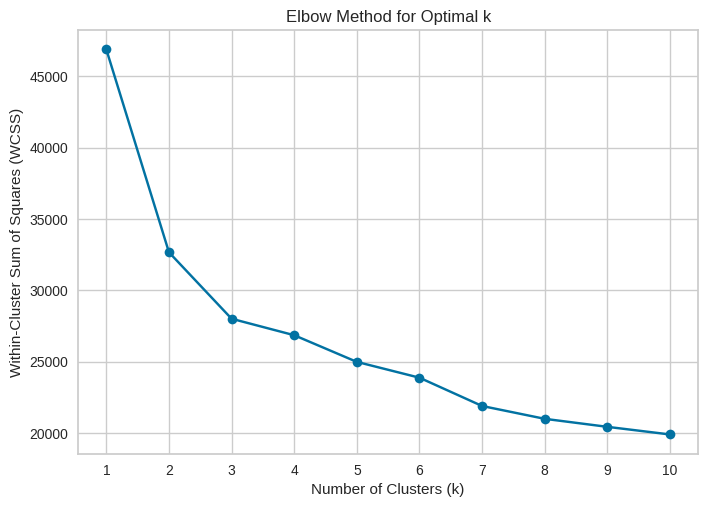

In [243]:
from sklearn.cluster import KMeans

k_values = range(1, 11) 

# Initialize an empty list to store the within-cluster sum of squares (WCSS) for each value of k
wcss = []

# Iterate over each value of k
for k in k_values:
    # Initialize the k-means clustering algorithm with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the k-means model to the subset data
    kmeans.fit(data1)
    
    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.show()

In [244]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat_AC = AC.fit_predict(data1)
data1["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

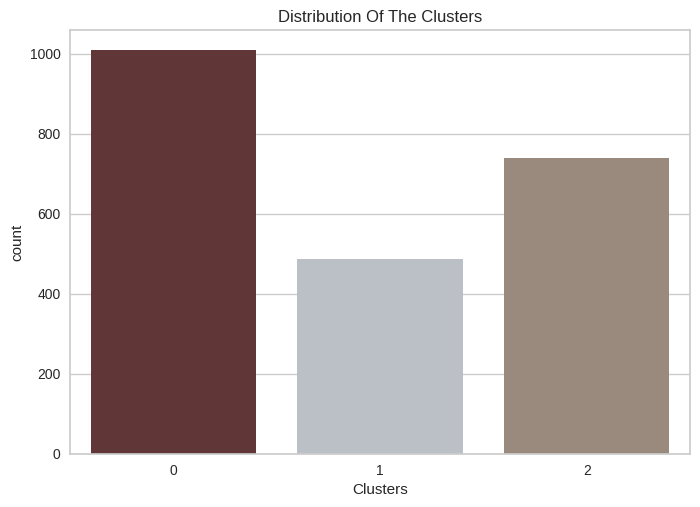

In [245]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

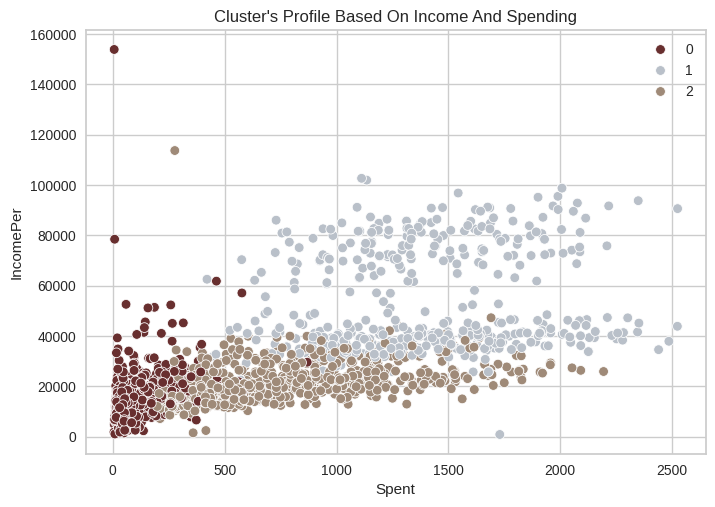

In [246]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["IncomePer"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

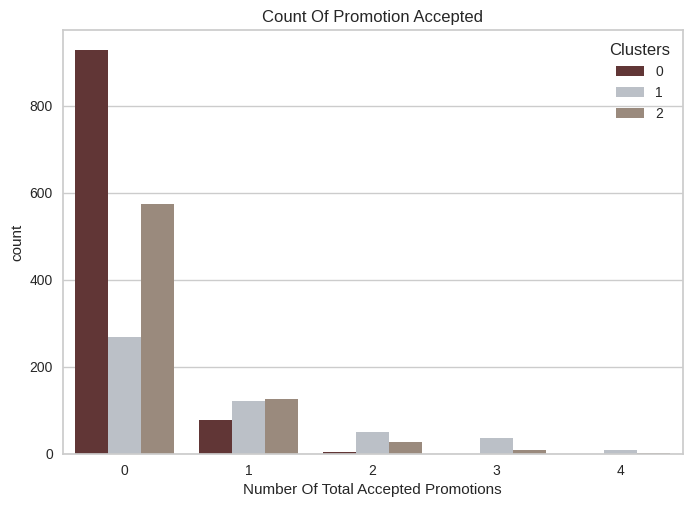

In [247]:
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

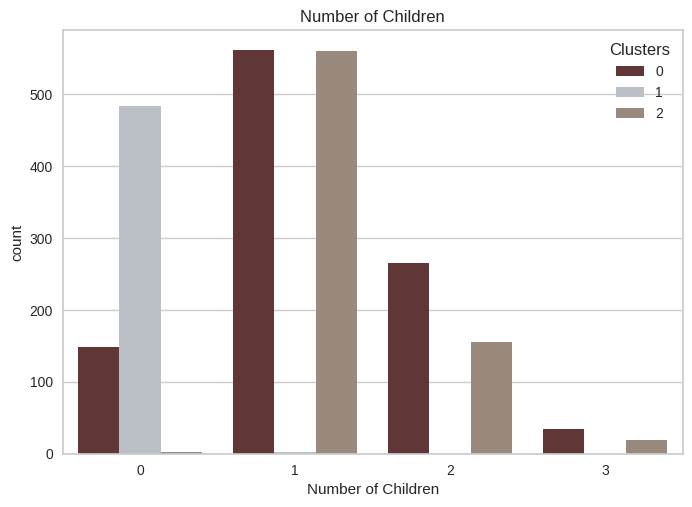

In [248]:
plt.figure()
pl = sns.countplot(x=df["Children"],hue=df["Clusters"], palette= pal)
pl.set_title("Number of Children")
pl.set_xlabel("Number of Children")
plt.show()

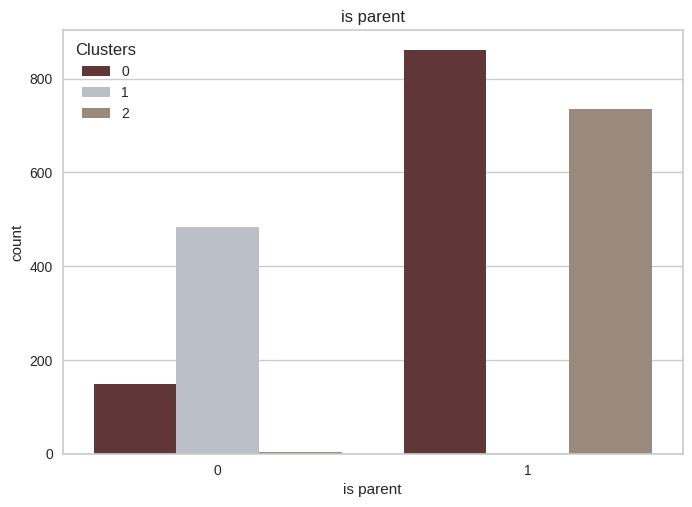

In [249]:
plt.figure()
pl = sns.countplot(x=df["Is_Parent"],hue=df["Clusters"], palette= pal)
pl.set_title("is parent")
pl.set_xlabel("is parent")
plt.show()

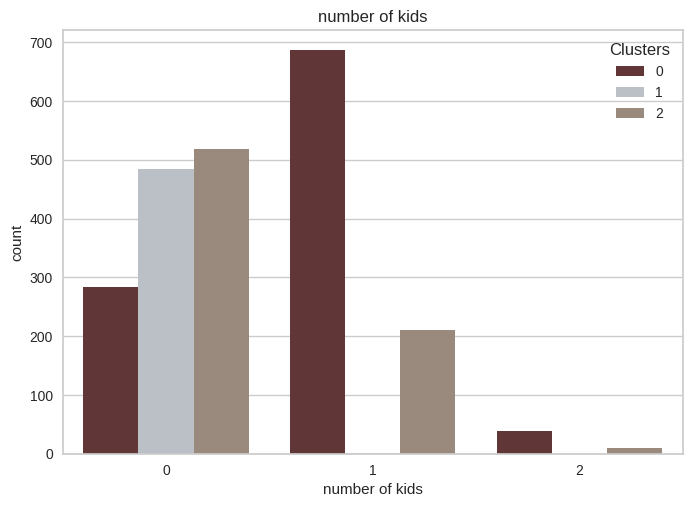

In [250]:
plt.figure()
pl = sns.countplot(x=df["Kidhome"],hue=df["Clusters"], palette= pal)
pl.set_title("number of kids")
pl.set_xlabel("number of kids")
plt.show()

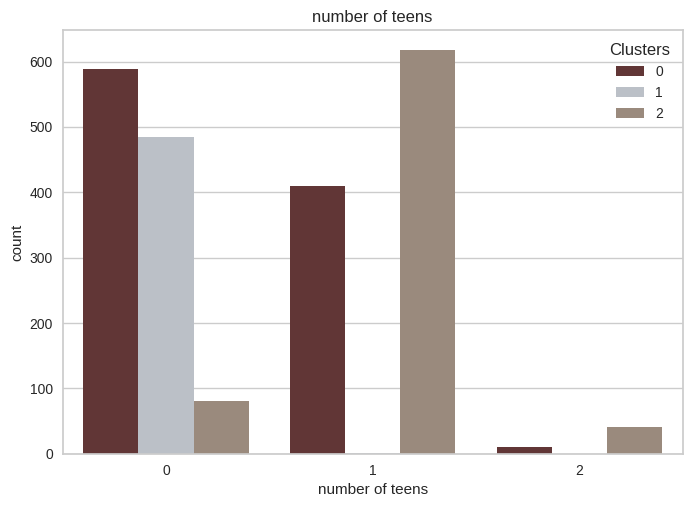

In [251]:
plt.figure()
pl = sns.countplot(x=df["Teenhome"],hue=df["Clusters"], palette= pal)
pl.set_title("number of teens")
pl.set_xlabel("number of teens")
plt.show()

In [252]:
#!pip install mlxtend

In [253]:
#data1.describe()
df.describe()

,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Spent,Living_With,Children,leisure_purchases,essential_purchases,Family_Size,Is_Parent,IncomePer,Total_Promos,Clusters
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,...,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000
mean,5588.393817,2.393817,51937.477599,0.444892,0.506720,49.154122,304.065412,26.244624,166.957885,37.415771,...,605.624104,0.646057,0.951613,375.005824,230.618280,2.597670,0.715502,24816.493044,0.297491,0.879032
std,3243.397549,1.122851,21420.681136,0.538613,0.544686,28.949677,336.871724,39.711783,225.752900,54.456115,...,602.123276,0.478299,0.752338,379.137821,285.968687,0.906846,0.451276,19398.504498,0.678301,0.876338
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,815.666667,0.000000,0.000000
25%,2828.250000,2.000000,35434.750000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,...,69.000000,0.000000,0.000000,41.000000,25.000000,2.000000,0.000000,12160.875000,0.000000,0.000000
50%,5454.500000,2.000000,51381.500000,0.000000,0.000000,49.500000,173.000000,8.000000,67.000000,12.000000,...,396.000000,1.000000,1.000000,245.000000,90.000000,3.000000,1.000000,18586.666667,0.000000,1.000000
75%,8421.750000,3.000000,68275.750000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,...,1044.250000,1.000000,1.000000,616.000000,356.000000,3.000000,1.000000,31910.375000,0.000000,2.000000
max,11191.000000,4.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,2525.000000,1.000000,3.000000,1689.000000,1727.000000,5.000000,1.000000,153924.000000,4.000000,2.000000


In [254]:
percentile_25 = df['MntSweetProducts'].quantile(0.25)
#print(percentile_75)
#median_value = df['MntGoldProds'].median()
#mean_value = df['MntGoldProds'].mean()
print(percentile_25)

1.0


In [255]:
cluster_means = df.groupby("Clusters").mean()

# Print cluster means
print("Cluster means:")
print(cluster_means)

Cluster means:
                   ID  Education        Income   Kidhome  Teenhome    Recency  \
Clusters                                                                        
0         5567.203373   2.258929  35103.525794  0.755952  0.427579  48.846230   
1         5650.203704   2.446502  75695.469136  0.002058  0.002058  49.417695   
2         5576.632791   2.543360  59284.685637  0.311653  0.947154  49.401084   

            MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
Clusters                                                           ...   
0          41.641865   5.254960        23.298611         7.694444  ...   
1         617.106996  64.288066       481.539095        93.325103  ...   
2         456.348238  29.860434       156.012195        41.192412  ...   

          adults_in_home        Spent  Living_With  Children  \
Clusters                                                       
0               1.642857    98.812500     0.642857  1.183532   
1               

In [256]:
#!pip install pyfpgrowth

In [257]:
import pyfpgrowth

# Define the unique cluster numbers
clusters = df['Clusters'].unique()

# Specify the minimum support threshold
min_support = 0.1
top_supported_itemsets = {}
# Iterate over each cluster
for cluster in clusters:
    # Filter the main dataset for the current cluster
    cluster_data = df[df['Clusters'] == cluster]
    # Convert the cluster data into transaction format
    transactions = []
    for index, row in cluster_data.iterrows():
        # Create a list to store items in the transaction
        transaction = []
        if row['MntWines'] > 175.50:
            transaction.append('wine')
        if row['MntFruits'] > 8:
            transaction.append('fruits')
        if row['MntMeatProducts'] > 68:
            transaction.append('meat')
        if row['MntFishProducts'] > 12:
            transaction.append('fish')
        if row['MntSweetProducts'] >8:
            transaction.append('sweet')
        if row['MntGoldProds'] > 24.5:
            transaction.append('gold')

    transactions.append(transaction)
    
    # Apply FP-Growth algorithm to find frequent itemsets for the current cluster
    patterns = pyfpgrowth.find_frequent_patterns(transactions, min_support)
    sorted_patterns = sorted(patterns.items(), key=lambda x: x[1], reverse=True)[:3]
    top_supported_itemsets[cluster] = sorted_patterns
    # Print frequent itemsets with their support for the current cluster
    print(f"Frequent itemsets for Cluster {cluster}:")
    for itemset, support in patterns.items():
        print(f"Itemset: {itemset}, Support: {support}")
        
    print()


Frequent itemsets for Cluster 1:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1
Itemset: ('fish',), Support: 1
Itemset: ('sweet',), Support: 1
Itemset: ('fruits', 'wine'), Support: 1
Itemset: ('meat', 'wine'), Support: 1
Itemset: ('fish', 'wine'), Support: 1
Itemset: ('sweet', 'wine'), Support: 1
Itemset: ('fruits', 'meat'), Support: 1
Itemset: ('fish', 'fruits'), Support: 1
Itemset: ('fruits', 'sweet'), Support: 1
Itemset: ('fish', 'meat'), Support: 1
Itemset: ('meat', 'sweet'), Support: 1
Itemset: ('fish', 'sweet'), Support: 1
Itemset: ('fruits', 'meat', 'wine'), Support: 1
Itemset: ('fish', 'fruits', 'wine'), Support: 1
Itemset: ('fruits', 'sweet', 'wine'), Support: 1
Itemset: ('fish', 'meat', 'wine'), Support: 1
Itemset: ('meat', 'sweet', 'wine'), Support: 1
Itemset: ('fish', 'sweet', 'wine'), Support: 1
Itemset: ('fish', 'fruits', 'meat'), Support: 1
Itemset: ('fruits', 'meat', 'sweet'), Support: 1
Itemset: ('fish', 'fruits', 'sweet'

In [258]:
for cluster, itemsets in top_supported_itemsets.items():
    print(f"Cluster {cluster}: Top three itemsets with the most support:")
    for itemset, support in itemsets:
        print(f"Itemset: {itemset}, Support: {support}")
    print()

Cluster 1: Top three itemsets with the most support:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1

Cluster 0: Top three itemsets with the most support:

Cluster 2: Top three itemsets with the most support:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1



In [259]:
min_support = 0.1
top_supported_itemsets = {}
# Iterate over each cluster
for cluster in clusters:
    # Filter the main dataset for the current cluster
    cluster_data = df[df['Clusters'] == cluster]
    # Convert the cluster data into transaction format
    transactions = []
    for index, row in cluster_data.iterrows():
        # Create a list to store items in the transaction
        transaction = []
        if row['MntWines'] > 24:
            transaction.append('wine')
        if row['MntFruits'] > 2:
            transaction.append('fruits')
        if row['MntMeatProducts'] > 16:
            transaction.append('meat')
        if row['MntFishProducts'] > 3:
            transaction.append('fish')
        if row['MntSweetProducts'] > 1:
            transaction.append('sweet')
        if row['MntGoldProds'] > 1:
            transaction.append('gold')

    transactions.append(transaction)
    
    # Apply FP-Growth algorithm to find frequent itemsets for the current cluster
    patterns = pyfpgrowth.find_frequent_patterns(transactions, min_support)
    sorted_patterns = sorted(patterns.items(), key=lambda x: x[1], reverse=True)[:3]
    top_supported_itemsets[cluster] = sorted_patterns
    # Print frequent itemsets with their support for the current cluster
    print(f"Frequent itemsets for Cluster {cluster}:")
    for itemset, support in patterns.items():
        print(f"Itemset: {itemset}, Support: {support}")
        
    print()


Frequent itemsets for Cluster 1:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1
Itemset: ('fish',), Support: 1
Itemset: ('sweet',), Support: 1
Itemset: ('gold',), Support: 1
Itemset: ('fruits', 'wine'), Support: 1
Itemset: ('meat', 'wine'), Support: 1
Itemset: ('fish', 'wine'), Support: 1
Itemset: ('sweet', 'wine'), Support: 1
Itemset: ('gold', 'wine'), Support: 1
Itemset: ('fruits', 'meat'), Support: 1
Itemset: ('fish', 'fruits'), Support: 1
Itemset: ('fruits', 'sweet'), Support: 1
Itemset: ('fruits', 'gold'), Support: 1
Itemset: ('fish', 'meat'), Support: 1
Itemset: ('meat', 'sweet'), Support: 1
Itemset: ('gold', 'meat'), Support: 1
Itemset: ('fish', 'sweet'), Support: 1
Itemset: ('fish', 'gold'), Support: 1
Itemset: ('gold', 'sweet'), Support: 1
Itemset: ('fruits', 'meat', 'wine'), Support: 1
Itemset: ('fish', 'fruits', 'wine'), Support: 1
Itemset: ('fruits', 'sweet', 'wine'), Support: 1
Itemset: ('fruits', 'gold', 'wine'), Support: 1


In [260]:
for cluster, itemsets in top_supported_itemsets.items():
    print(f"Cluster {cluster}: Top three itemsets with the most support:")
    for itemset, support in itemsets:
        print(f"Itemset: {itemset}, Support: {support}")
    print()

Cluster 1: Top three itemsets with the most support:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1

Cluster 0: Top three itemsets with the most support:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1

Cluster 2: Top three itemsets with the most support:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1



# ML by Arash

In [237]:
df01 = df.copy()

In [261]:
df01['Living_With']=LE.fit_transform(df01['Living_With'])

### getting insight

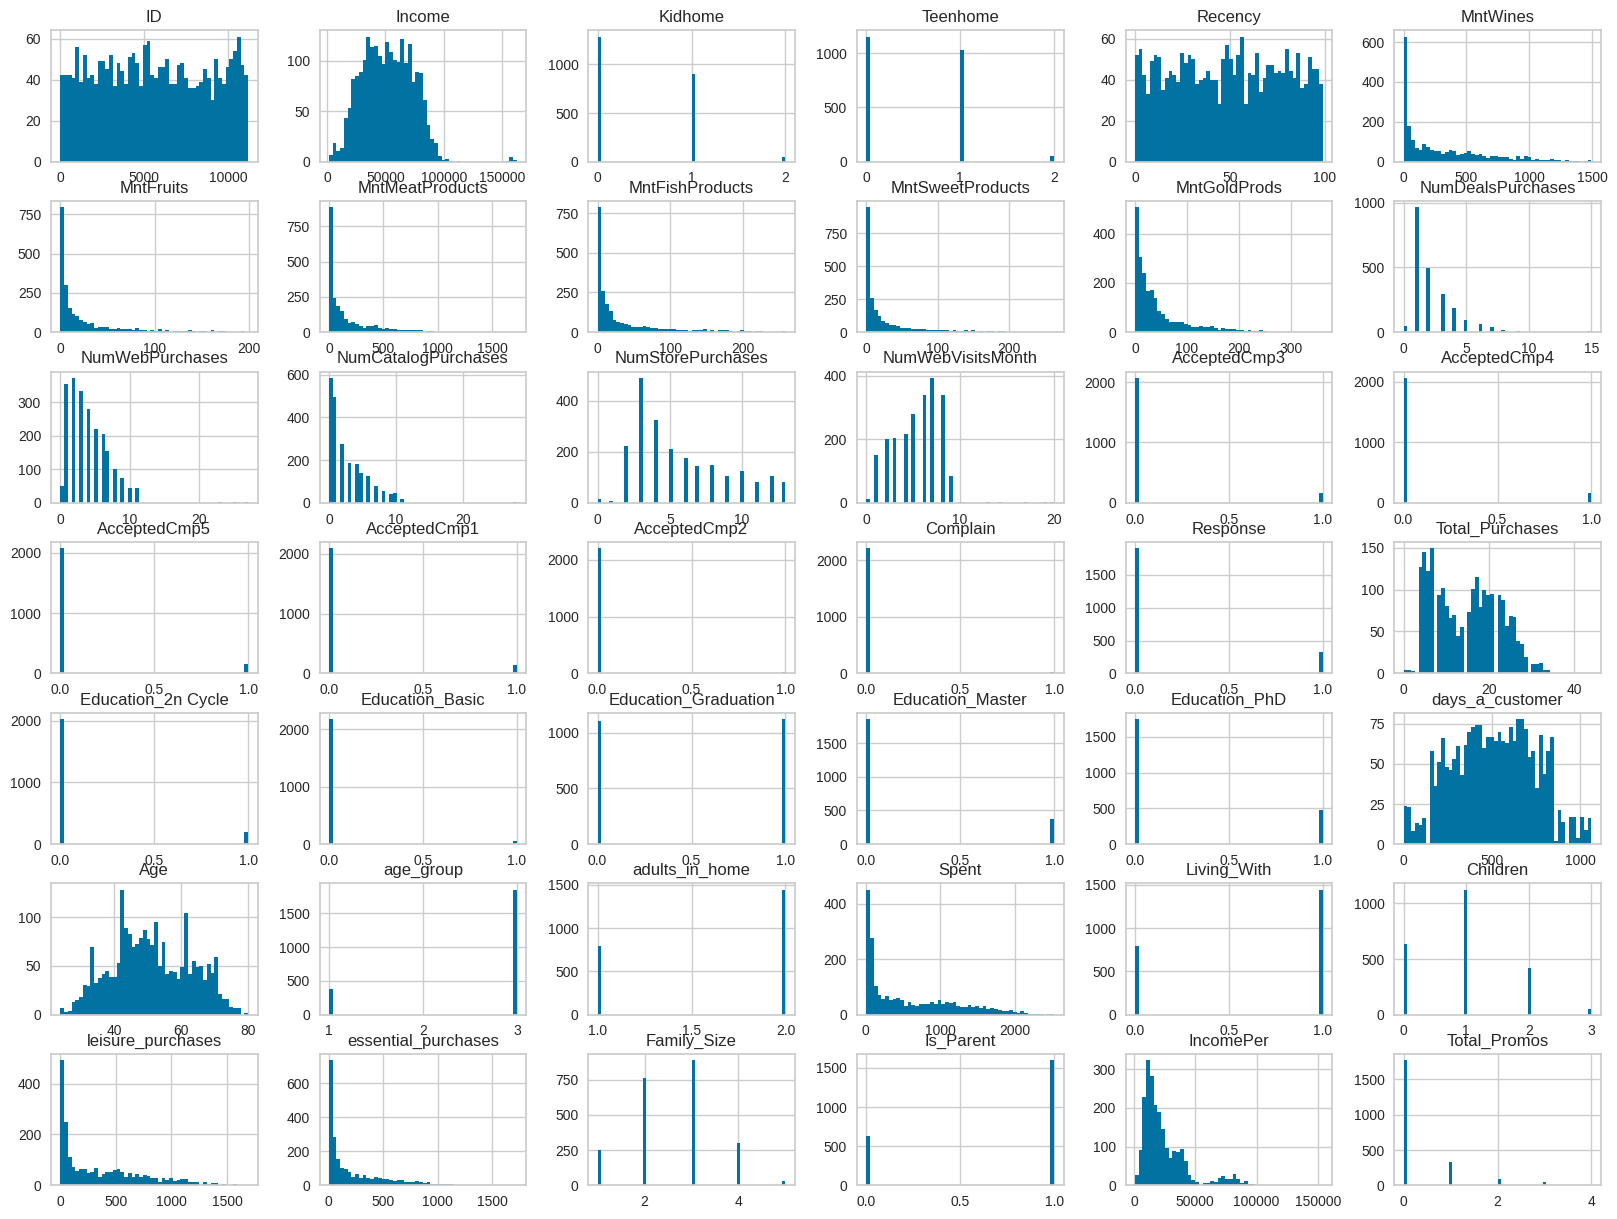

In [262]:
df01.hist(bins=50, figsize=(20,15))
plt.show()

In [263]:
df01.columns

Index(['ID', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Total_Purchases', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'days_a_customer', 'Age', 'age_group', 'adults_in_home', 'Spent',
       'Living_With', 'Children', 'leisure_purchases', 'essential_purchases',
       'Family_Size', 'Is_Parent', 'IncomePer', 'Total_Promos'],
      dtype='object')

<BarContainer object of 2 artists>

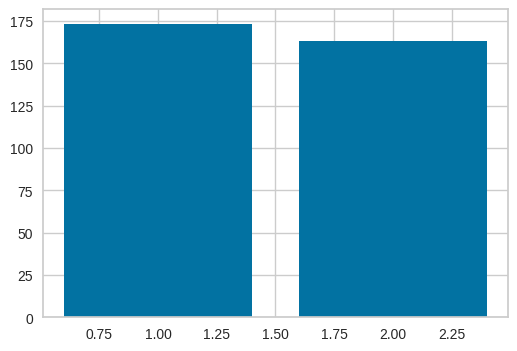

In [264]:
income_mean = df01.groupby('adults_in_home')['MntMeatProducts'].mean()
plt.figure(figsize=(6,4))
plt.bar(income_mean.index, income_mean.values)

### Kmeans clustring

**ToDo:**
1. removing outliers in income
2. scaling
3. elbow method
4. kmeans
5. insights!
6. RFM
7. insights!

In [265]:
selected_attributes_01 = ['IncomePer', 'Kidhome','Teenhome','Spent','Children','Family_Size','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                     'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'age_group']
selected_attributes_02 = ['IncomePer','Spent','Children','Family_Size', 'leisure_purchases', 'essential_purchases', 'NumDealsPurchases', 'age_group']
MLdata01 = df01[selected_attributes_01].copy()
MLdata02 = df01[selected_attributes_02].copy()

In [266]:
scaler = StandardScaler()
scaler.fit(MLdata01)
MLdata01 = pd.DataFrame(scaler.transform(MLdata01),columns= MLdata01.columns )

scaler.fit(MLdata02)
MLdata02 = pd.DataFrame(scaler.transform(MLdata02),columns= MLdata02.columns )

Kmeans on MLdata01 set of attributes which is a detailed set

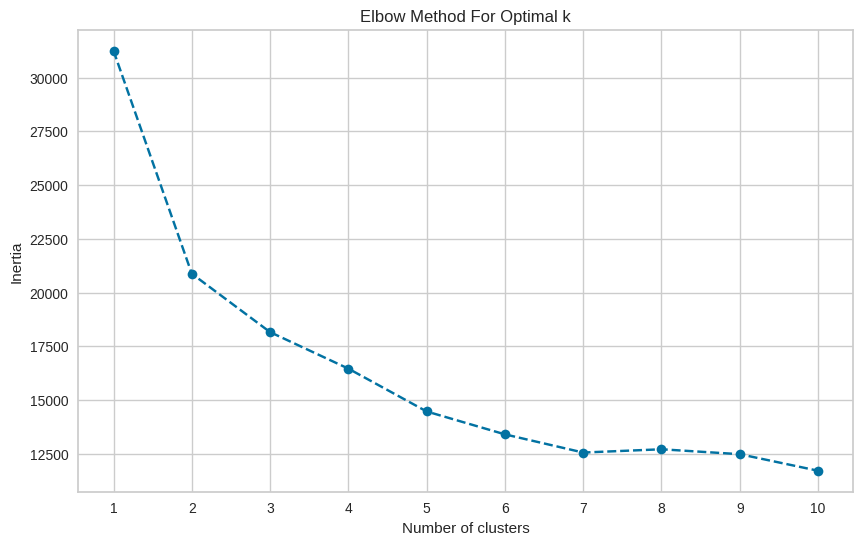

In [267]:
inertia = []
kmeans_range = range(1, 11)

for k in kmeans_range:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(MLdata01)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(kmeans_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(kmeans_range)
plt.grid(True)
plt.show()

In [268]:
# Proceeding with K-means clustering using 4 clusters
kmeans_final = KMeans(n_clusters=2, random_state=42)
kmeans_final.fit(MLdata01)

# Assigning the clusters to the original data
df01['Cluster'] = kmeans_final.labels_

# Analyzing the characteristics of each cluster
cluster_summary = df01.groupby('Cluster').mean(numeric_only=True)
cluster_summary.T

Cluster,0,1
ID,5577.020462,5612.425384
Income,41813.030363,73330.138075
Kidhome,0.635644,0.041841
Teenhome,0.617162,0.273361
Recency,48.796700,49.909344
MntWines,158.572937,611.486750
MntFruits,8.530693,63.673640
MntMeatProducts,53.704290,406.259414
MntFishProducts,12.003300,91.111576
MntSweetProducts,8.897690,65.557880


**insights:**

This summary of the average values for each cluster can help us understand the characteristics that define each group:

**Cluster 0:** 

This cluster is characterized by lower income levels, larger family sizes, and reduced expenditure patterns. Notably, there's a higher likelihood of parenthood within this group. Despite their decreased responsiveness to promotional efforts overall, they demonstrate a notable response surge beginning in round 3 of campaigns, tapering off after round 4. While they frequently visit web stores, their primary shopping preference lies in physical stores. Additionally, this segment displays a tendency for seeking deals, indicating potential opportunities for targeted discount or value-based marketing strategies.

**Cluster 1:** 

This cluster exhibits a higher income bracket, tends to have smaller household sizes, and shows a decreased likelihood of parenthood compared to other groups. Generally responsive to promotional initiatives, they display a preference for in-store shopping experiences, while also actively engaging with catalog and online shopping channels. Their purchasing behavior suggests a balanced utilization of various shopping platforms, indicating potential opportunities for targeted marketing strategies across multiple channels to effectively engage this audience.

An interesting fact in customer behavior is that cluster 0 with lower income, roughly purchases 1/7.5 ratio of amout of products compaired to cluster 1 with higher income. However, this pattern deviates notably for wine and gold purchases, where the ratio is approximately 1/3.5. Moreover, there appears to be no substantial variance in education levels between the two clusters.

Kmeans on MLdata02 set of attributes which is a detailed set

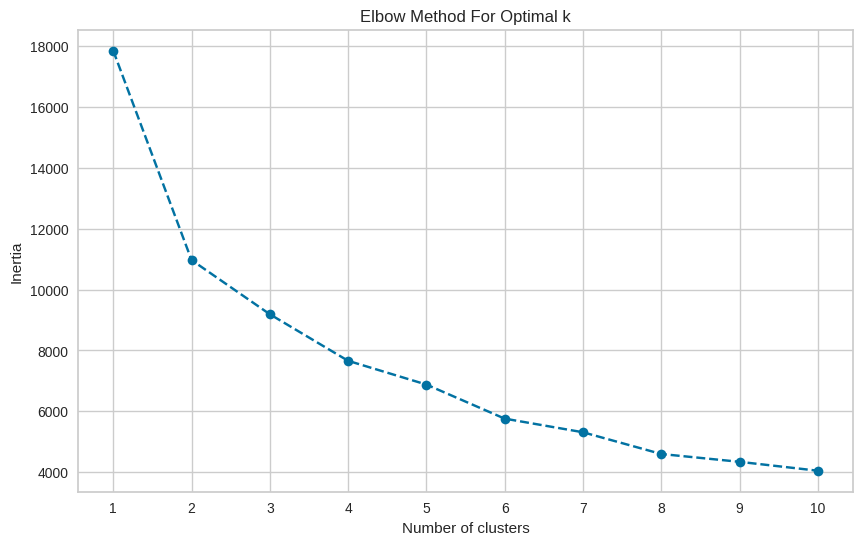

In [269]:
inertia = []
kmeans_range = range(1, 11)

for k in kmeans_range:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(MLdata02)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(kmeans_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(kmeans_range)
plt.grid(True)
plt.show()

In [270]:
# Proceeding with K-means clustering using 4 clusters
kmeans_final = KMeans(n_clusters=4, random_state=42)
kmeans_final.fit(MLdata02)

# Assigning the clusters to the original data
df01['Cluster'] = kmeans_final.labels_

# Analyzing the characteristics of each cluster
cluster_summary = df01.groupby('Cluster').mean(numeric_only=True)
cluster_summary.T

Cluster,0,1,2,3
ID,5596.819188,5601.920354,5752.134855,5398.936082
Income,35758.797048,43234.714602,76689.091286,62569.721649
Kidhome,0.555966,1.046460,0.004149,0.136082
Teenhome,0.263223,1.048673,0.024896,0.888660
Recency,48.168512,48.953540,49.497925,50.651546
MntWines,63.964330,112.453540,630.838174,560.367010
MntFruits,8.195572,5.632743,64.919087,37.274227
MntMeatProducts,33.782288,40.457965,485.265560,191.752577
MntFishProducts,12.297663,7.913717,95.927386,48.865979
MntSweetProducts,8.509225,6.356195,66.794606,38.142268


**insights:**

This summary of the average values for each cluster can help us understand the characteristics that define each group. This clustering pattern generally confirms the previous one, but provides more insights regarding high income group. It seams that after income, parenthood is the second important factor that influences customer behavior.

Cluster 2 and 3 are higher income customers in this analysis. In these higher income groups, group 2  is less probable to be parents. They buy more  in all categories but the difference in essential household products and specially meat products. Notably, the smaller family size in Cluster 2 is primarily attributed to a lack of children rather than living alone, suggesting that most individuals in this group neither live alone nor have children. Moreover, Cluster 2 displays a marked inclination towards responding to promotions, often engaging either from the onset in campaign 1 or initiating response from campaign 4 onwards, maintaining consistent engagement through campaign 5. Remarkably, they demonstrate the lowest frequency of web visits and deal purchases.

### RFM Analysis

Recency, frequency, monetary value (RFM) is a model used in marketing analysis that segments a company’s consumer base by their purchasing patterns or habits. In particular, it evaluates customers’ recency (how long ago they made a purchase), frequency (how often they make purchases), and monetary value (how much money they spend). 
RFM is then used to identify a company’s or an organization’s best customers by measuring and analyzing spending habits to improve low-scoring customers and maintain high-scoring ones.
(https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp)

**Recency:** How recently a customer has made a purchase

**Frequency:** How often a customer makes a purchase

**Monetary value:** How much money a customer spends on purchases

We need to calculate these metrics for each customer in our dataset. Recency is already included in the dataset, and we have calculated total expenditure for each customer in spent column which in this analysis we refer to it as Monetory metric. Unfortunately there is no time wise purchase logging in the dataset so we can not calculate frequecy of customer interaction directly. But there is still information about number of purchases from different channels as NumWebPurchases, NumCatalogPurchases and NumStorePurchases.

In [107]:
df02 = df.copy()

In [108]:
df02['days_a_customer'].describe()

count    2232.000000
mean      512.048835
std       232.149351
min         0.000000
25%       340.750000
50%       513.000000
75%       685.000000
max      1063.000000
Name: days_a_customer, dtype: float64

In [109]:
df02['days_a_customer'] = df02['days_a_customer']+10

In [110]:
df02[['Spent', 'days_a_customer','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Recency']].describe()

,Spent,days_a_customer,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Recency
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000
mean,605.624104,522.048835,4.085573,2.660394,5.794803,49.154122
std,602.123276,232.149351,2.781015,2.921548,3.253934,28.949677
min,5.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,350.750000,2.000000,0.000000,3.000000,24.000000
50%,396.000000,523.000000,4.000000,2.000000,5.000000,49.500000
75%,1044.250000,695.000000,6.000000,4.000000,8.000000,74.000000
max,2525.000000,1073.000000,27.000000,28.000000,13.000000,99.000000


In [111]:
df02

,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,adults_in_home,Spent,Living_With,Children,leisure_purchases,essential_purchases,Family_Size,Is_Parent,IncomePer,Total_Promos
0,5524,2,58138.0,0,0,58,635,88,546,172,...,1.0,1617,0,0,811,806,1,0,58138.000000,0
1,2174,2,46344.0,1,1,38,11,1,6,2,...,1.0,27,0,2,18,9,3,1,15448.000000,0
2,4141,2,71613.0,0,0,26,426,49,127,111,...,2.0,776,1,0,489,287,2,0,35806.500000,0
3,6182,2,26646.0,1,0,26,11,4,20,10,...,2.0,53,1,1,19,34,3,1,8882.000000,0
4,5324,4,58293.0,1,0,94,173,43,118,46,...,2.0,422,1,1,215,207,3,1,19431.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2,61223.0,0,1,46,709,43,182,42,...,2.0,1341,1,1,1074,267,3,1,20407.666667,0
2236,4001,4,64014.0,2,1,56,406,0,30,0,...,2.0,444,1,3,414,30,5,1,12802.800000,1
2237,7270,2,56981.0,0,0,91,908,48,217,32,...,1.0,1241,0,0,944,297,1,0,56981.000000,1
2238,8235,3,69245.0,0,1,8,428,30,214,80,...,2.0,843,1,1,519,324,3,1,23081.666667,0


In [112]:
df02.rename(columns={'Spent': 'Monetary'}, inplace=True)
df02['Frequency'] = (df02[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1))/df02['days_a_customer']

In [113]:
df02

,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Monetary,Living_With,Children,leisure_purchases,essential_purchases,Family_Size,Is_Parent,IncomePer,Total_Promos,Frequency
0,5524,2,58138.0,0,0,58,635,88,546,172,...,1617,0,0,811,806,1,0,58138.000000,0,0.022426
1,2174,2,46344.0,1,1,38,11,1,6,2,...,27,0,2,18,9,3,1,15448.000000,0,0.029630
2,4141,2,71613.0,0,0,26,426,49,127,111,...,776,1,0,489,287,2,0,35806.500000,0,0.041494
3,6182,2,26646.0,1,0,26,11,4,20,10,...,53,1,1,19,34,3,1,8882.000000,0,0.080000
4,5324,4,58293.0,1,0,94,173,43,118,46,...,422,1,1,215,207,3,1,19431.000000,0,0.042296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2,61223.0,0,1,46,709,43,182,42,...,1341,1,1,1074,267,3,1,20407.666667,0,0.029038
2236,4001,4,64014.0,2,1,56,406,0,30,0,...,444,1,3,414,30,5,1,12802.800000,1,0.211268
2237,7270,2,56981.0,0,0,91,908,48,217,32,...,1241,0,0,944,297,1,0,56981.000000,1,0.055385
2238,8235,3,69245.0,0,1,8,428,30,214,80,...,843,1,1,519,324,3,1,23081.666667,0,0.064417


In [114]:
# df02['Recency'] = df02['Recency'] + 1
# df02['Frequency'] = df02['Frequency'] + 1
# df02.head()

In [115]:
rfm_scores = df02[['Recency', 'Frequency', 'Monetary']].copy()

In [116]:
rfm_scores.describe()

,Recency,Frequency,Monetary
count,2232.000000,2232.000000,2232.000000
mean,49.154122,0.041828,605.624104
std,28.949677,0.124317,602.123276
min,0.000000,0.000000,5.000000
25%,24.000000,0.012492,69.000000
50%,49.500000,0.023655,396.000000
75%,74.000000,0.036598,1044.250000
max,99.000000,1.909091,2525.000000


In [117]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
# scaling all scores to prevent scale influnce of each individual score on the final score 
scaler = MinMaxScaler(feature_range=(1, 10))
scaler.fit(df02[['Recency', 'Frequency', 'Monetary']])
scaled_df = pd.DataFrame(scaler.transform(df02[['Recency', 'Frequency', 'Monetary']]),columns= rfm_scores.columns )
df02[['Recency', 'Frequency', 'Monetary']] = scaled_df

In [98]:
df02[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,2225.000000,2225.000000,2225.000000
mean,5.468641,1.197606,3.147319
std,2.630541,0.586941,2.151621
min,1.000000,1.000000,1.000000
25%,3.181818,1.058929,1.228571
50%,5.545455,1.111713,2.396429
75%,7.727273,1.172857,4.714286
max,10.000000,10.000000,10.000000


In [99]:
df02

,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Monetary,Living_With,Children,leisure_purchases,essential_purchases,Family_Size,Is_Parent,IncomePer,Total_Promos,Frequency
0,5524,2,58138.0,0,0,6.272727,635,88,546,172,...,6.757143,0,0,811,806,1,0,58138.000000,0,1.105723
1,2174,2,46344.0,1,1,4.454545,11,1,6,2,...,1.078571,0,2,18,9,3,1,15448.000000,0,1.139683
2,4141,2,71613.0,0,0,3.363636,426,49,127,111,...,3.753571,1,0,489,287,2,0,35806.500000,0,1.195614
3,6182,2,26646.0,1,0,3.363636,11,4,20,10,...,1.171429,1,1,19,34,3,1,8882.000000,0,1.377143
4,5324,4,58293.0,1,0,9.545455,173,43,118,46,...,2.489286,1,1,215,207,3,1,19431.000000,0,1.199396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2,61223.0,0,1,NaN,709,43,182,42,...,NaN,1,1,1074,267,3,1,20407.666667,0,NaN
2236,4001,4,64014.0,2,1,NaN,406,0,30,0,...,NaN,1,3,414,30,5,1,12802.800000,1,NaN
2237,7270,2,56981.0,0,0,NaN,908,48,217,32,...,NaN,0,0,944,297,1,0,56981.000000,1,NaN
2238,8235,3,69245.0,0,1,NaN,428,30,214,80,...,NaN,1,1,519,324,3,1,23081.666667,0,NaN


In [100]:
# Assigning scores from 1 to 4 based on quartiles for each metric. 1 is the higher
for column in rfm_scores.columns:
    if column == 'Recency':
        # For recency, a lower score (closer to recent) is better, so we invert the scoring
        rfm_scores[column] = pd.qcut(df02[column], 4, labels=range(4, 0, -1))
    else:
        rfm_scores[column] = pd.qcut(df02[column], 4, labels=range(1, 5))

In [101]:
rfm_scores[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,2225,2225,2225
unique,4,4,4
top,3,1,1
freq,573,557,564


In [102]:
rfm_scores['RFM_Score'] = rfm_scores[['Recency', 'Frequency', 'Monetary']].sum(axis=1)

In [103]:
rfm_scores.head()

,Recency,Frequency,Monetary,RFM_Score
0,2,2,4,8
1,3,3,1,7
2,3,4,3,10
3,3,4,1,8
4,1,4,3,8


In [104]:
# Combining RFM scores into a single string score and calculating an overall RFM Score
rfm_scores['RFM_Segment'] = rfm_scores.apply(lambda x: ''.join(x.astype(str)), axis=1)
rfm_scores['RFM_Score'] = rfm_scores[['Recency', 'Frequency', 'Monetary']].sum(axis=1)

# Checking the distribution of RFM Scores
rfm_score_distribution = rfm_scores['RFM_Score'].value_counts().sort_index()

In [105]:
rfm_scores.min()

Recency                                                        4
Frequency                                                      1
Monetary                                                       1
RFM_Score                                   -9223372036854775808
RFM_Segment    -9223372036854775808-9223372036854775808-92233...
dtype: object

In [106]:
rfm_score_distribution

RFM_Score
-9223372036854775808      7
 3                       94
 4                      156
 5                      231
 6                      311
 7                      286
 8                      335
 9                      315
 10                     259
 11                     179
 12                      59
Name: count, dtype: int64

# ML by ?